<a href="https://colab.research.google.com/github/fcoprata/EBAC-IA/blob/main/Intelig%C3%AAncia_Artificial_na_pr%C3%A1tica_para_iniciantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1 - Entendimento do Problema 

## Melhorar a conversão de vendas a partir da análise de campanhas realizadas no Facebook. 

# Etapa 2: Coleta de Dados

#### Você pode baixar esse conjunto de dados no site: https://www.kaggle.com/loveall/clicks-conversion-tracking

# Etapa 3: Análise, Interpretação e Visualização dos Dados


#### Importando as bibliotecas

In [ ]:
#Manipulação dos dados
import pandas as pd

#Visualização 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Avaliação do Modelo
from sklearn.metrics import r2_score

#### Carregando os dados

In [ ]:
df = pd.read_csv("KAG_conversion_data.csv")

#### Primeira Inspeção

In [ ]:
df.head() #Lista as 5 primeiras linhas (por default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.tail() #Lista as 5 últimas linhas (por default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [ ]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1143, step=1)

In [ ]:
df.shape

(1143, 11)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df_clicks = df["Clicks"]

In [ ]:
df_clicks.head()

0    1
1    2
2    0
3    1
4    1
Name: Clicks, dtype: int64

In [ ]:
type(df_clicks)

pandas.core.series.Series

In [ ]:
df.info() #Explicar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#### Dicionário dos dados



1.   ad_id - ID único para cada anúncio
2.   xyzcampaignid - ID associado a cada campanha publicitária da empresa XYZ
3.   fbcampaignid - ID associado a como o Facebook rastreia cada campanha.
4.   age - idade da pessoa a quem o anúncio é mostrado.
5.   gender - sexo da pessoa que deseja que o anúncio seja mostrado
6.   interest - código que especifica a categoria à qual pertence o interesse da pessoa (os interesses são mencionados no perfil público da pessoa no Facebook)
7.   Impression - o número de vezes que o anúncio foi mostrado.
8.   Clicks - número de cliques nesse anúncio.
9.   Spent - Valor pago pela empresa xyz ao Facebook, para exibir aquele anúncio.
10.  Total conversion - Número total de pessoas que fizeram perguntas sobre o produto depois de ver o anúncio.
11.  Approved conversion - Número total de pessoas que compraram o produto depois de ver o anúncio.

#### Renomeando as colunas

In [ ]:
df.rename(columns = {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id': 'id_fb_campanha',
                     'age': 'idade', 'gender': 'genero', 'interest': 'interesse', 'Impressions': 'numero_exibicoes',
                     'Clicks': 'cliques_no_anuncio', 'Spent': 'valor_pago_anuncio', 'Total_Conversion': 'conversao',
                     'Approved_Conversion': 'compras'}, inplace = True)



```
`# This is formatted as code`
```

#### Informações Estatísticas

In [ ]:
df.describe()

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
df.describe(include="all")

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


#### Dados Faltantes

In [ ]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interesse             0
numero_exibicoes      0
cliques_no_anuncio    0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

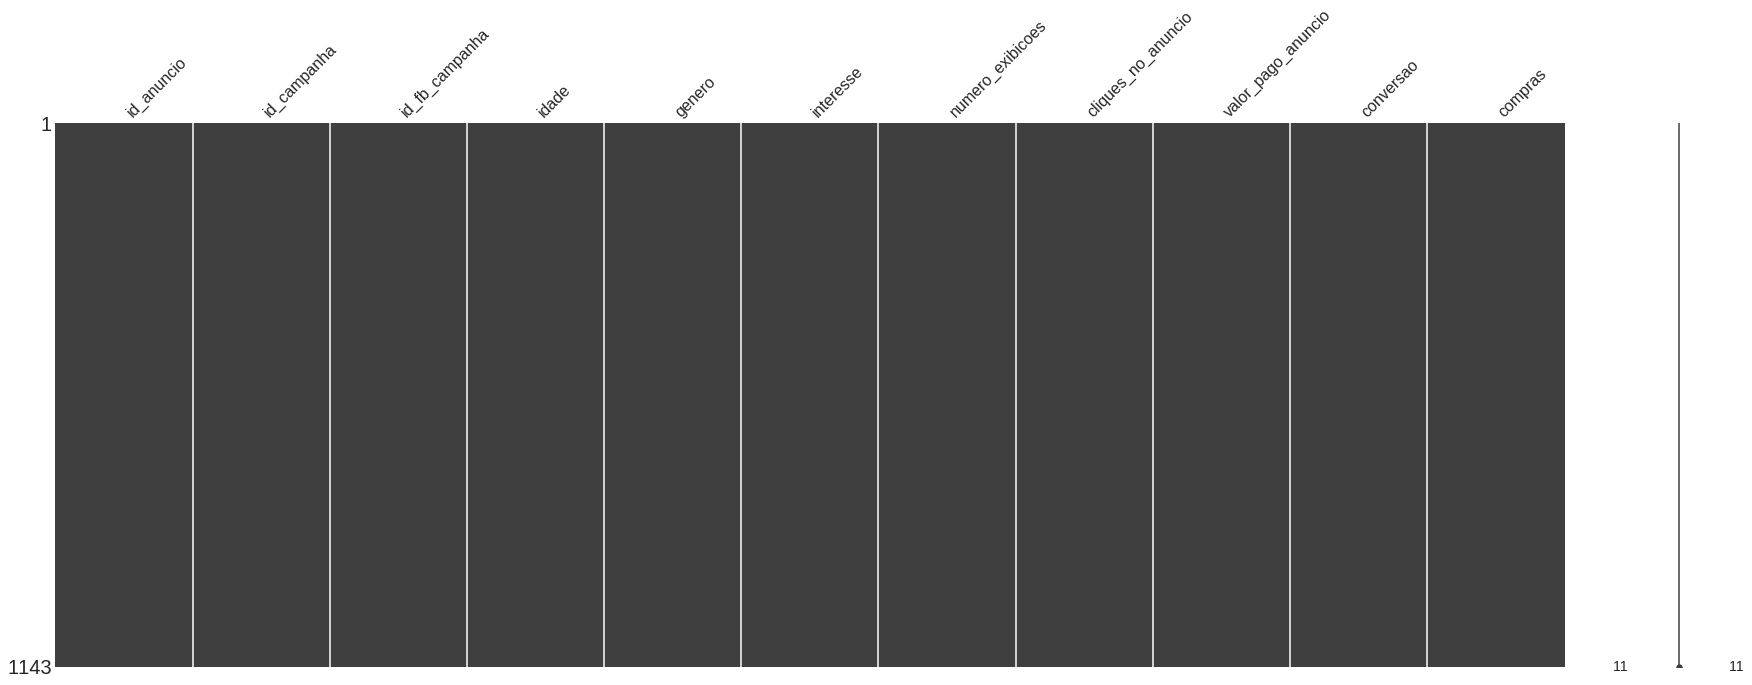

In [ ]:
missingno.matrix(df, figsize = (30,10))

#### Outliers

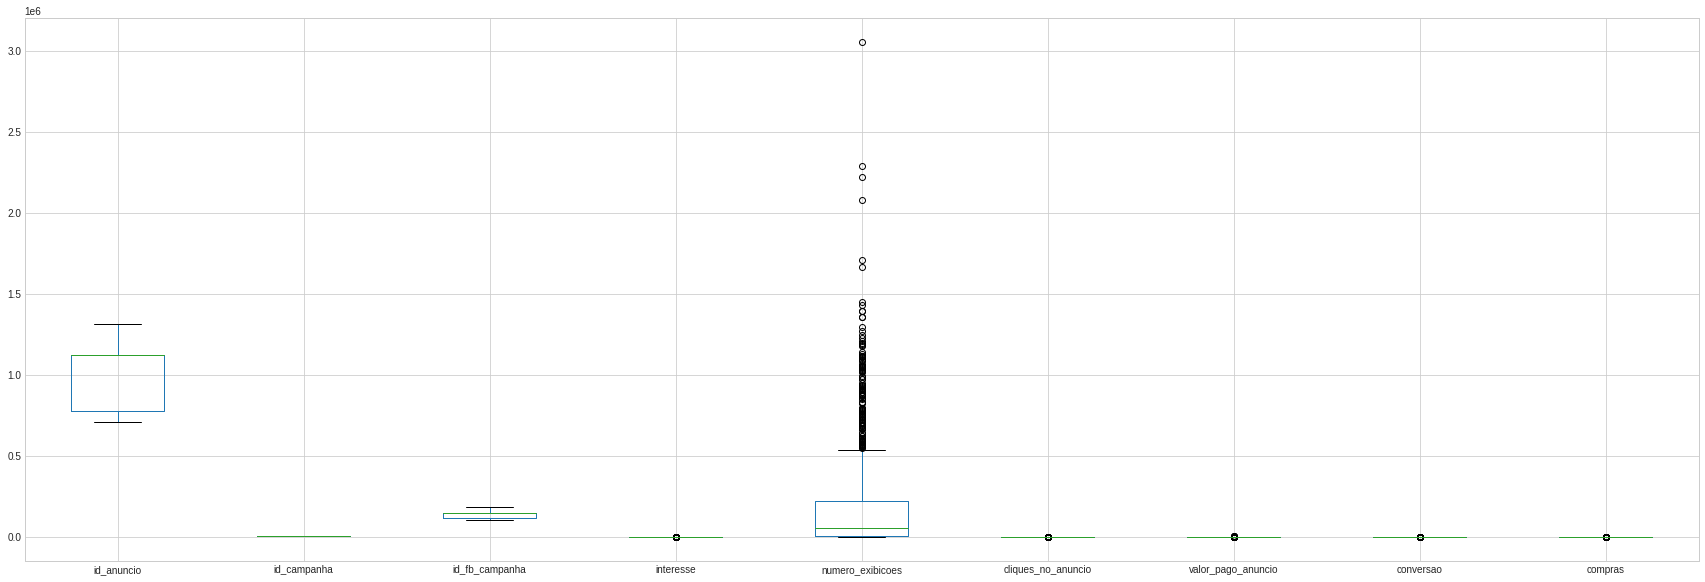

In [ ]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

#### Duplicatas

In [ ]:
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras


#### Matriz de Correlação 

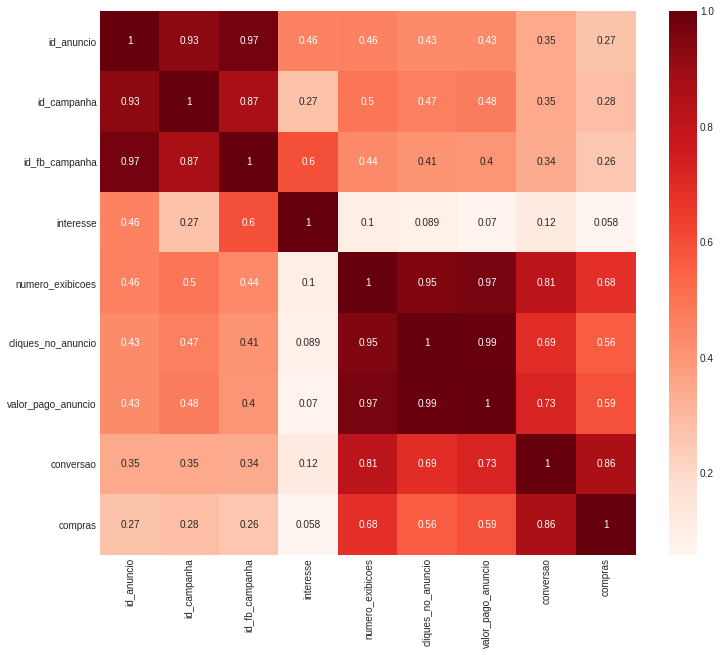

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

"numero_exibicoes" e "conversao" estão mais correlacionados com "compras" do que "cliques_no_anuncio" e "valor_pago_anuncio".

#### Avaliando as Features (Colunas)

##### id_campanha - ID associado a cada campanha publicitária da empresa XYZ

In [ ]:
df["id_campanha"].unique()

array([ 916,  936, 1178])

Existem 3 campanhas diferentes

In [ ]:
df["id_campanha"].replace({916:"campanha_1", 936:"campanha_2", 1178: "campanha_3"}, inplace=True)

In [ ]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


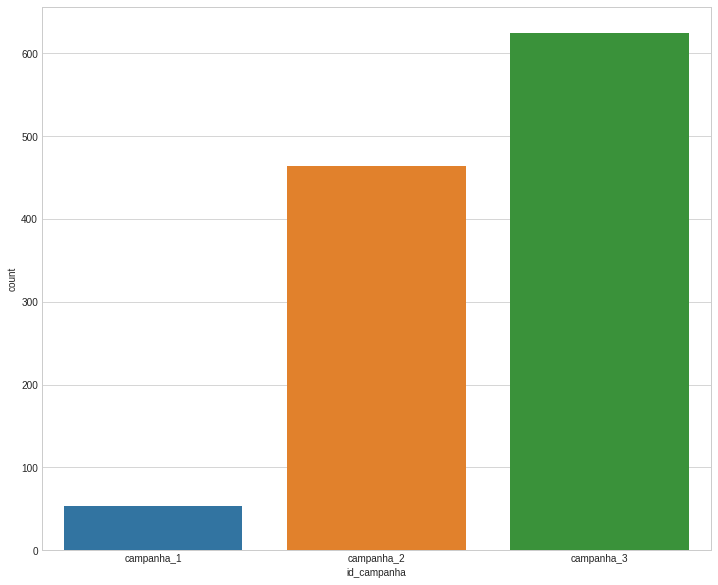

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x ='id_campanha', data = df) 
plt.show()

Campanha_3 tem o maior número de anúncios.

##### compras - Número total de pessoas que compraram o produto depois de ver o anúncio.

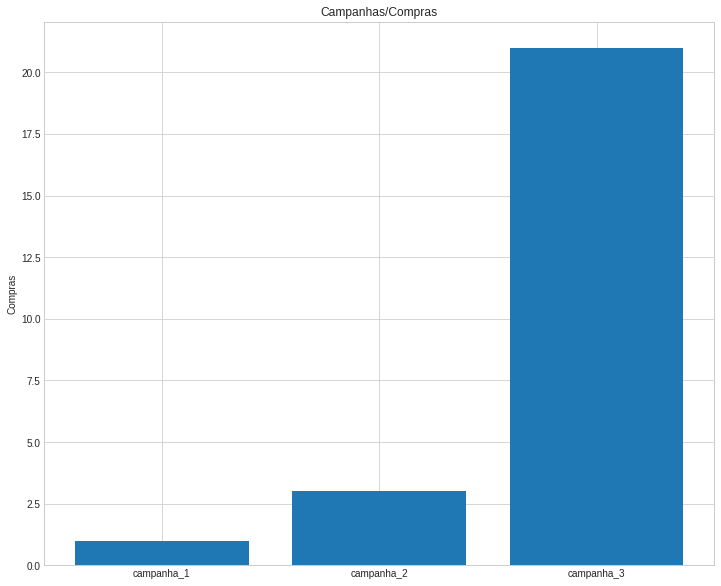

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras")
plt.title("Campanhas/Compras")
plt.show()

A maioria das pessoas comprou produtos ligados a campanha_3

##### idade - idade da pessoa a quem o anúncio é mostrado.

In [ ]:
df["idade"].nunique()

4

In [ ]:
df["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

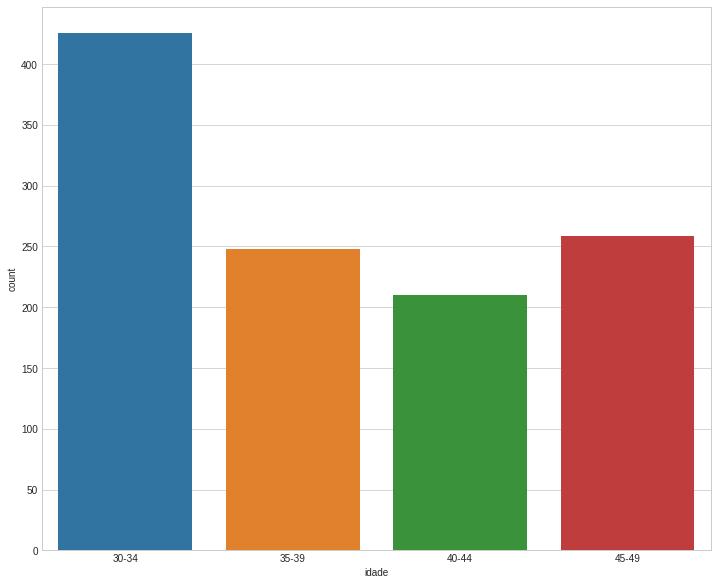

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x ='idade', data = df) 
plt.show() 

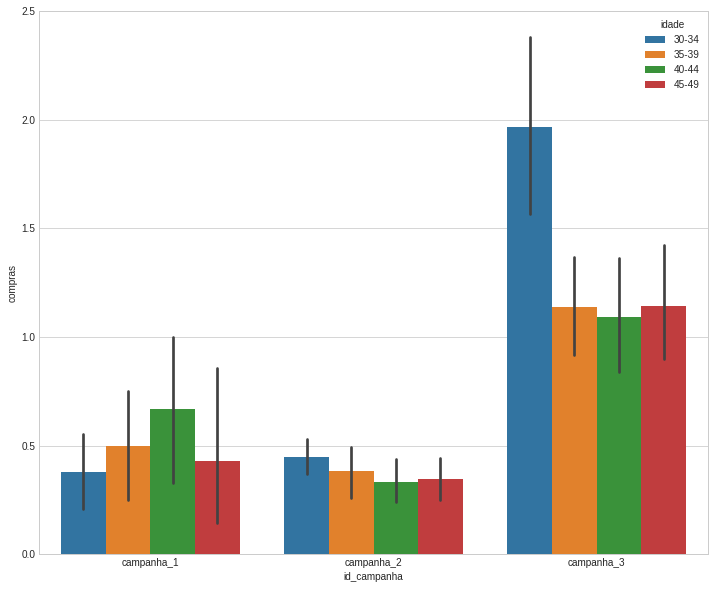

In [ ]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["idade"], data=tips)
plt.show()

Na campanha_3 e campanha_2 o grupo de 30-34 anos mostra mais interesse

Na campanha_1 o grupo de 40-44 anos mostra mais interesse

##### gênero - sexo da pessoa que deseja que o anúncio seja mostrado

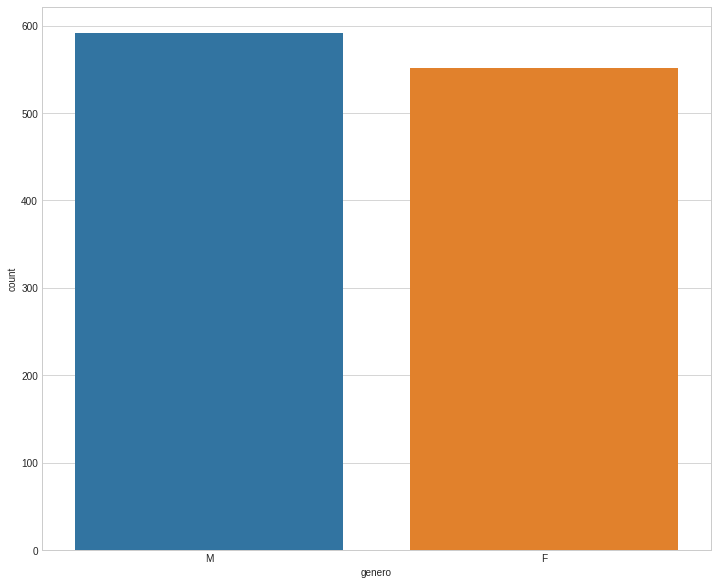

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x ='genero', data = df) 
plt.show()

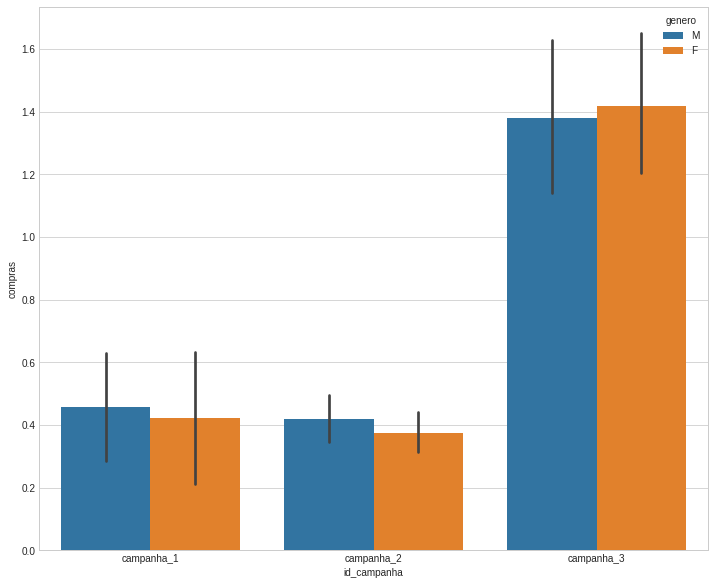

In [ ]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["genero"], data=tips)
plt.show()

Ambos os gêneros mostrar interesses semelhantes nas três campanhas

#### interesse - código que especifica a categoria à qual pertence o interesse da pessoa (os interesses são mencionados no perfil público da pessoa no Facebook)

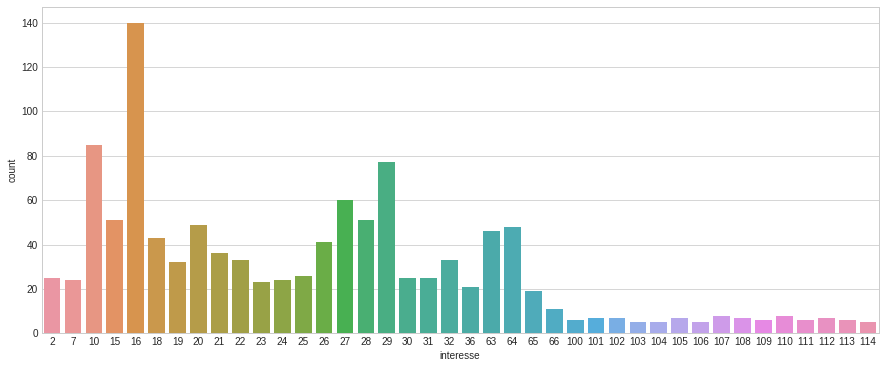

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x ='interesse', data = df) 
plt.show()

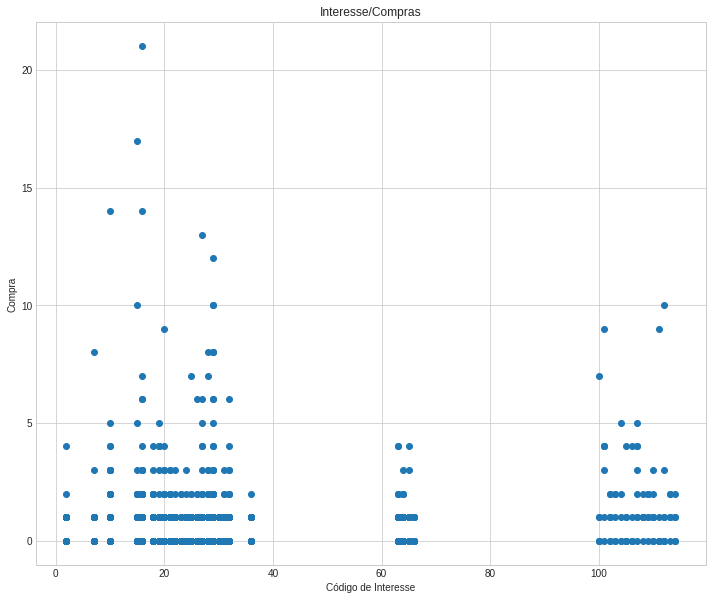

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(df["interesse"], df["compras"])
plt.title("Interesse/Compras")
plt.xlabel("Código de Interesse")
plt.ylabel("Compra")
plt.show()

Observamos que após o código 100 há um aumento de usuários que compraram o produto. 

Vamos abrir isso um pouco mais?

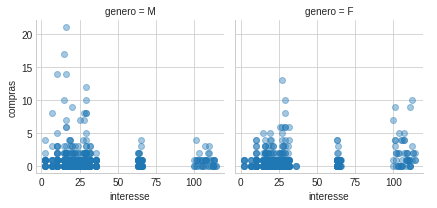

In [ ]:
#Por gênero
genero = sns.FacetGrid(df, col="genero")
genero.map(plt.scatter, "interesse", "compras", alpha=.4)
genero.add_legend();

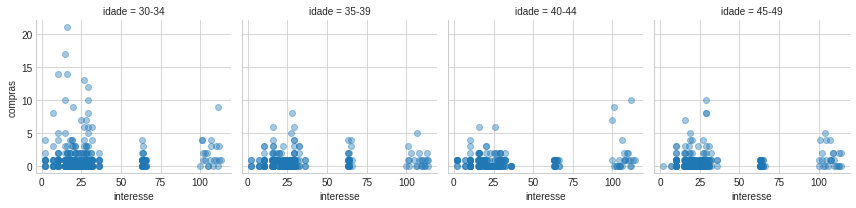

In [ ]:
#por idade
idade = sns.FacetGrid(df, col="idade")
idade.map(plt.scatter, "interesse", "compras", alpha=.4)
genero.add_legend();

#### valor_pago_anuncio - Valor pago pela empresa xyz ao Facebook, para exibir aquele anúncio.

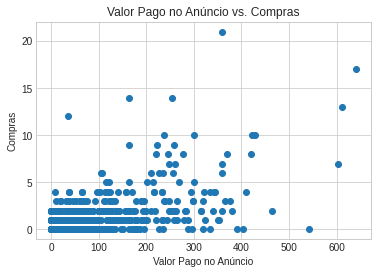

In [ ]:
plt.scatter(df["valor_pago_anuncio"], df["compras"])
plt.title("Valor Pago no Anúncio vs. Compras")
plt.xlabel("Valor Pago no Anúncio")
plt.ylabel("Compras")
plt.show()

A medida que o dinheiro gasto no anúncio aumenta, o número de produtos comprados aumenta

Vamos abrir isso um pouco mais?

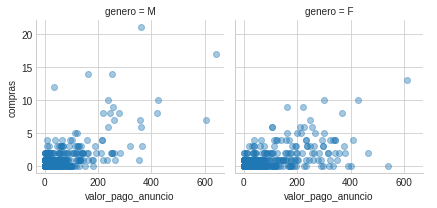

In [ ]:
#Gênero
genero = sns.FacetGrid(df, col="genero")
genero.map(plt.scatter, "valor_pago_anuncio", "compras", alpha=.4)
genero.add_legend();

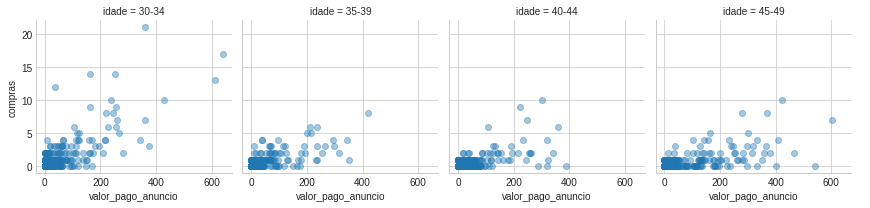

In [ ]:
#Idade
genero = sns.FacetGrid(df, col="idade")
genero.map(plt.scatter, "valor_pago_anuncio", "compras", alpha=.4)
genero.add_legend();

#### numero_exibicoes - o número de vezes que o anúncio foi mostrado.

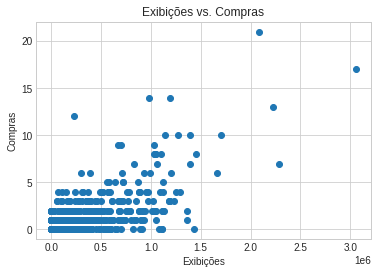

In [ ]:
plt.scatter(df["numero_exibicoes"], df["compras"])
plt.title("Exibições vs. Compras")
plt.xlabel("Exibições")
plt.ylabel("Compras")
plt.show()

Aumento nas compras após um certo ponto nas exibições

#### Pessoal realmente compraram

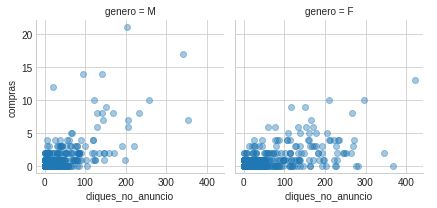

In [ ]:
genero = sns.FacetGrid(df, col="genero")
genero.map(plt.scatter, "cliques_no_anuncio", "compras", alpha=.4)
genero.add_legend();

Parece que os homens tendem a clicar mais do que as mulheres, mas as mulheres compram mais produtos do que os homens depois de clicar em adicionar.

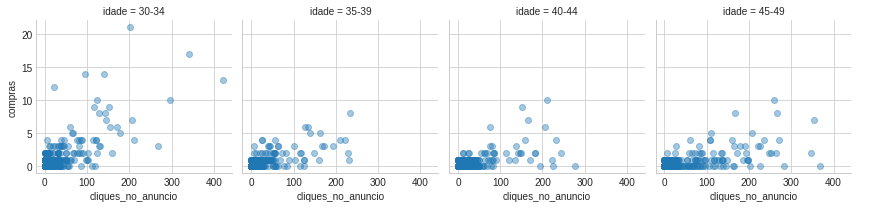

In [ ]:
idade = sns.FacetGrid(df, col="idade")
idade.map(plt.scatter, "cliques_no_anuncio", "compras", alpha=.4)
idade.add_legend();

Pessoas na faixa etária de 30 a 34 anos têm mais tendência a comprar o produto depois de clicar em adicionar.

A faixa etária de 30 a 34 anos tende a levar menos tempo para tomar decisões, seguida por 35 a 39 anos e 40 a 44 anos.

Além disso, campanha_1 se sai muito bem, considerando o número de anúncios que envolve. Com um número menor de anúncios, ele conseguiu um desempenho melhor do que o campanha_2 com um grande número de anúncios.

# Etapa 4: Modelagem/Machine Learning


In [ ]:
df.shape

(1143, 11)

In [ ]:
amostra_df = df.sample(n=200)

In [ ]:
type(amostra_df)

pandas.core.frame.DataFrame

In [ ]:
amostra_df.shape

(200, 11)

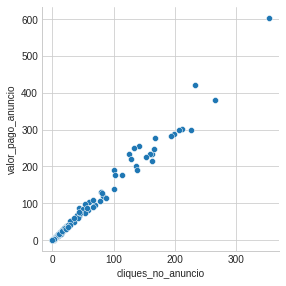

In [ ]:
sns.pairplot(amostra_df, x_vars=['cliques_no_anuncio'], y_vars=['valor_pago_anuncio'], height=4, kind='scatter')
plt.show()

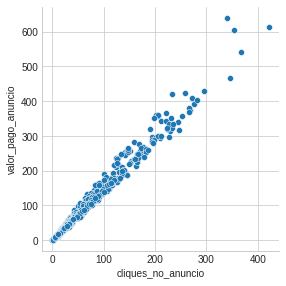

In [ ]:
sns.pairplot(df, x_vars=['cliques_no_anuncio'], y_vars=['valor_pago_anuncio'], height=4, kind='scatter')
plt.show()

In [ ]:
#Trocar idade
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)

In [ ]:
df = df.replace('M',1)
df = df.replace('F',0)

In [ ]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [ ]:
X = df[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques_no_anuncio']]

In [ ]:
y = df['valor_pago_anuncio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [ ]:
model = LinearRegression()

Faz um fit, ou seja, encontra a linha que melhor se ajusta aos dados

y = a*x + b


In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_ #a

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [ ]:
model.intercept_

-13.191111867749427

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.994899077013531

In [ ]:
model.score(X_test, y_test)

0.994899077013531

### Predição para Campanhas no Facebook

In [ ]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [ ]:
idade = float(input("Idade: "))
genero = int(input("Gênero: "))
interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cliques_no_anuncio = int(input("Cliques: "))

Idade: 0.0011
Gênero: 1
Interesse: 16
Exibições: 400
Cliques: 1


In [ ]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cliques_no_anuncio]])

In [ ]:
print("O total")

O total


In [ ]:
pred

array([1.62201366])